In [0]:
%load_ext autoreload
%autoreload 2
  
from pprint import pprint
import numpy as np
import torch as th
import torch.functional as thf


import matplotlib
from matplotlib import pyplot
pyplot.ion()
pyplot.style.use('dark_background')


In [0]:
th.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [0]:
a = th.tensor([[1, 2],[3, 4]], dtype=th.float)
a

tensor([[1., 2.],
        [3., 4.]])

In [0]:
a_gpu = a.cuda()
print(a_gpu)
a_cpu = a_gpu.cpu()
print(a_cpu)

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]])


In [0]:
a.view(1, -1)

tensor([[1., 2., 3., 4.]])

In [0]:
print(a.mean(dim=0))
print(a.std(dim=1))

tensor([2., 3.])
tensor([0.7071, 0.7071])


In [0]:
a = th.ones((2, 3), requires_grad=True)
print(a.data)
print(a.grad)


tensor([[1., 1., 1.],
        [1., 1., 1.]])
None


In [0]:
x = th.ones(2, requires_grad=True)
y = 5 * (x + 2) ** 2

o = (1 / 2) * th.sum(y)
o.backward()

x.grad

tensor([15., 15.])

## Gradient of Normal Distribution

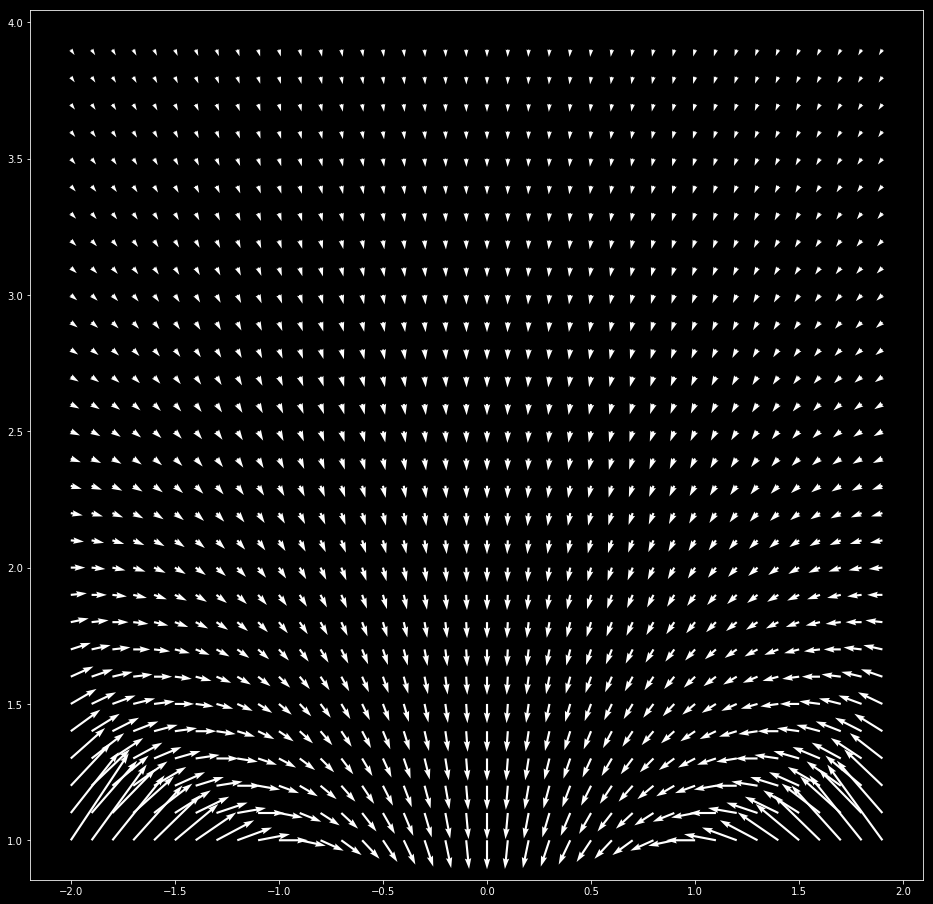

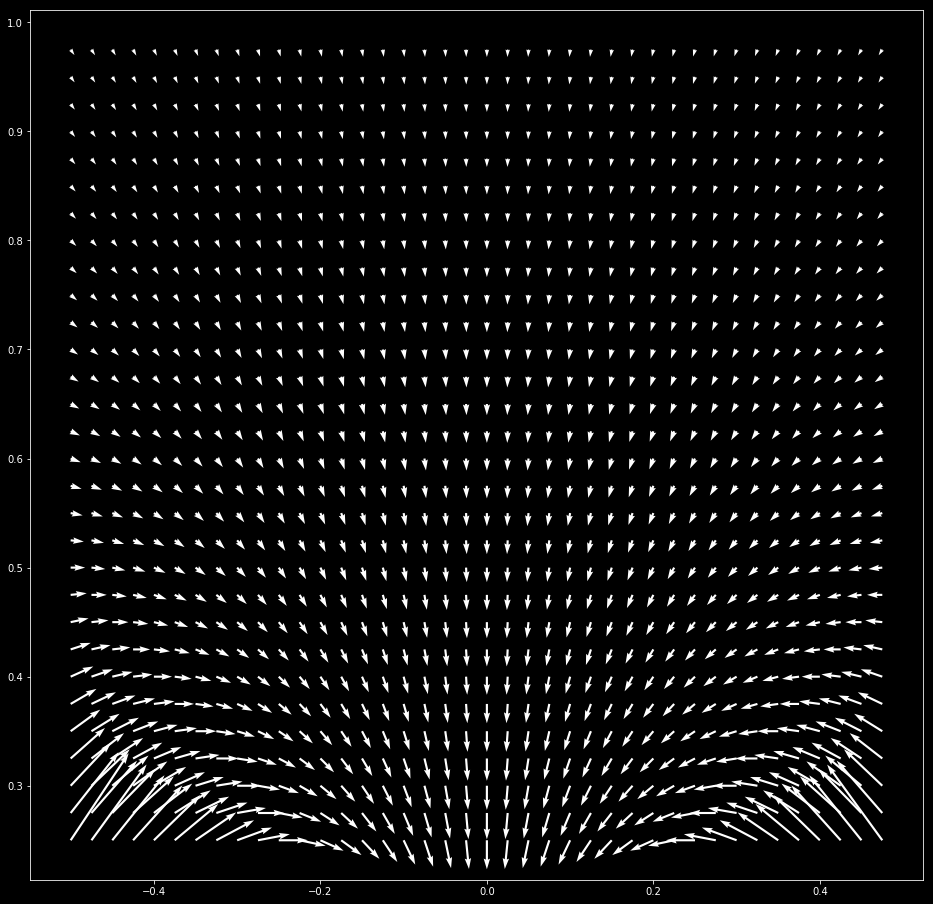

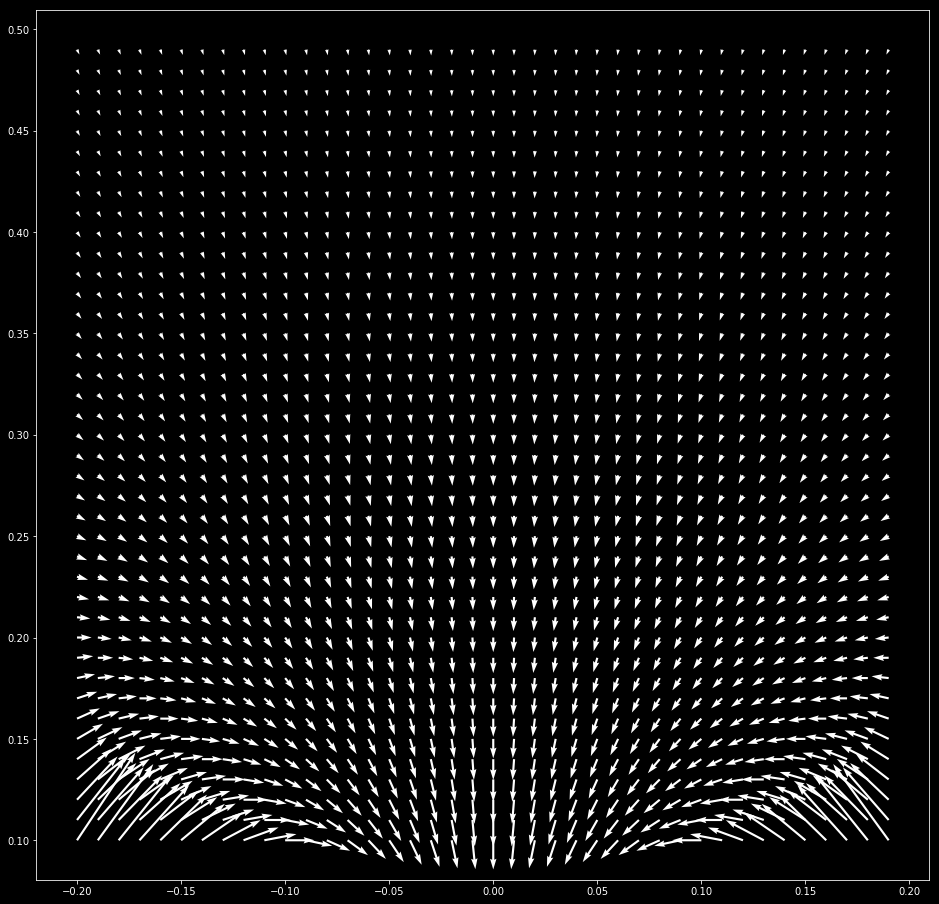

In [0]:
# Testing backprop through torch.distributions.Normal

def to_var(x, requires_grad=True):
  return th.tensor(x, requires_grad=True)

def visualize_grads(mean_width, std_width):
  increment = mean_width / 20
  m_range = np.arange(-mean_width, mean_width, increment)
  s_range = np.arange(mean_width / 2, std_width, increment)
  means, stds = np.meshgrid(m_range, s_range)
  grad_means = []
  grad_stds = []
  for s in s_range:
    grad_means.append([])
    grad_stds.append([])
    for m in m_range:
      mean, std = to_var([m]), to_var([s])
      d = th.distributions.Normal(mean, std)
      log_prob = d.log_prob(to_var([0.0], False))
      loss = log_prob  # try exp here!
      loss.backward()
      grad_means[-1].append(mean.grad.data.numpy()[0])
      grad_stds[-1].append(std.grad.data.numpy()[0])
  grad_means = np.array(grad_means)
  grad_stds = np.array(grad_stds)
  pyplot.ion()
  pyplot.figure(figsize=(16, 16))
  pyplot.quiver(means, stds, grad_means, grad_stds, color='w')

visualize_grads(2, 4)
visualize_grads(0.5, 1)
visualize_grads(0.2, 0.5)



In [0]:
def test_torch_normal_sample():
  mean = to_var([0.0])
  std = to_var([1.0])
  d = th.distributions.Normal(mean, std)
  real = d.sample()
  loss = th.abs(10 - real) # does not work
  loss.backward()
  print('torch.distributions.Normal sample')
  print(f'mean grad: {mean.grad}')
  print(f'std grad: {std.grad}')
#test_torch_normal_sample()

def test_torch_normal_logprob():
  mean = to_var([0.0])
  std = to_var([1.0])
  d = th.distributions.Normal(mean, std)
  log_prob = d.log_prob(to_var([10.0], False))
  loss = log_prob
  loss.backward()
  print('torch.distributions.Normal logprob')
  print(f'mean grad: {mean.grad}')
  print(f'std grad: {std.grad}')
test_torch_normal_logprob()



def test_torch_randn():
  mean = to_var([0.0])
  std = to_var([1.0])
  d = th.distributions.Normal(to_var([0.0], False),
                              to_var([1.0], False))
  sampled = d.sample()
  real = sampled * std + mean
  #log_prob = d.log_prob(sampled)
  loss = -th.abs(10 - real)
  loss.backward()
  print('reparameterization.')
  print(mean.grad)
  print(std.grad)
test_torch_randn()


torch.distributions.Normal logprob
mean grad: tensor([10.])
std grad: tensor([99.])
reparameterization.
tensor([1.])
tensor([-1.8825])


In [0]:
# Test plotter.top_k()

from rl.algs import plotter

def test_top_k():
  plt = plotter.Plotter()
  plt.add_data('a', 5, -1)
  plt.add_data('a', 10, 3)
  plt.add_data('a', 15, 6)
  plt.add_data('a', 20, 5)
  
  print(plt.top_k('a', k=3))

test_top_k()


In [0]:
x = th.tensor([1, 2, 3])
y = th.tensor(x)
print(x, y)

tensor([1, 2, 3]) tensor([1, 2, 3])


In [0]:
from rl.algs import util

a = util.to_variable(x)
print(a)

y.data.cpu().numpy()

type(y)
b = np.array([1, 2], dtype=int)
print(type(b))
c = th.Tensor(b)
d = th.from_numpy(b)
print(c, d)
c.type(None)
d.type(None)

tensor([1., 2., 3.], device='cuda:0')
<class 'numpy.ndarray'>
tensor([1., 2.]) tensor([1, 2])


'torch.LongTensor'

In [0]:
x = th.rand(3)
print(x)
y = util.normalize(x, 1, 2)
z = util.normalize(x, 1, 2, eps=1e-5)
print(y, z)

tensor([0.3577, 0.3293, 0.1462])
tensor([ 2.3930,  1.8987, -1.2917]) tensor([ 2.3929,  1.8986, -1.2915])


In [0]:
from rl.envs import grid_world

g = grid_world.GridWorld()
g.render()
g._state.shape


array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 2]])


(4, 4, 1)

In [0]:
g.step(0)

(array([[[0],
         [0],
         [0],
         [1]],
 
        [[0],
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         [2]]]), -1, False, None)

In [0]:
W = th.tensor([[3, 1], [2, 4], [1, 5]])
W2 = W.t()
x_1 = th.tensor([10, 20])
x_2 = th.tensor([3])

print(W)
print(W2)
print(x_1)
print(x_2)

tensor([[3, 1],
        [2, 4],
        [1, 5]])
tensor([[3, 2, 1],
        [1, 4, 5]])
tensor([10, 20])
tensor([3])


In [0]:
W @ x_1

tensor([ 50, 100, 110])

In [0]:
try:
  W @ x_2
except Exception as e:
  print(e)

size mismatch, [3 x 2], [1] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:1965


In [0]:
W * x_1

tensor([[ 30,  20],
        [ 20,  80],
        [ 10, 100]])

In [0]:
W * x_2

tensor([[ 9,  3],
        [ 6, 12],
        [ 3, 15]])

In [0]:
W @ W2

tensor([[10, 10,  8],
        [10, 20, 22],
        [ 8, 22, 26]])

In [0]:
try:
  W * W2
except Exception as e:
  print(e)
  

The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1


In [0]:
try:
  W @ W
except Exception as e:
  print(e)

size mismatch, m1: [3 x 2], m2: [3 x 2] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:2070


In [0]:
W * W

tensor([[ 9,  1],
        [ 4, 16],
        [ 1, 25]])

In [0]:
gpu_tensor = th.ones((1, 1), requires_grad=True).cuda()
gpu_tensor.item()

1.0

In [0]:
gpu_tensor.to('cpu', dtype=None)

tensor([[1.]], grad_fn=<CopyBackwards>)

In [0]:
th.int

torch.int32

In [0]:
util.to_variable([1, 2])

tensor([1., 2.], device='cuda:0', requires_grad=True)

In [0]:
a = np.array([1.0, 2, 3])
a_t = util.to_variable(a)
print(a, a_t)
a[0] = 10
print(a, a_t)
a_t[1] = 20
print(a, a_t)

[1. 2. 3.] tensor([1., 2., 3.], requires_grad=True)
[10.  2.  3.] tensor([1., 2., 3.], requires_grad=True)
[10.  2.  3.] tensor([ 1., 20.,  3.], grad_fn=<CopySlices>)


In [0]:
util.to_numpy(a_t)

array([ 1., 20.,  3.], dtype=float32)

In [0]:
util.to_numpy(th.ones(3, requires_grad=False))

array([1., 1., 1.], dtype=float32)

In [0]:
a = th.ones(3, requires_grad=True)
b = th.ones(1, requires_grad=False)

c = a + b
c.requires_grad_()
d = th.sum(c)

In [0]:
print(d.requires_grad)
d.backward()

True


In [0]:
c.requires_grad

True

In [0]:
print(c.grad)

None


In [0]:
c

tensor([2., 2., 2.], grad_fn=<ThAddBackward>)

In [0]:
a.grad

tensor([1., 1., 1.])

In [0]:
th.tensor(np.array([1, 2, 3]), dtype=th.float, requires_grad=False)

tensor([1., 2., 3.])

## NamedTuple

In [13]:
from typing import NamedTuple

class Rollout(NamedTuple):
  states: th.Tensor
  actions: int = 0
  rewards: float = 0
    
  
    
r = Rollout(th.zeros(3, 2), rewards=[1, 2, 3])
pprint(r)
r[0]

Rollout(states=tensor([[0., 0.],
        [0., 0.],
        [0., 0.]]), actions=0, rewards=[1, 2, 3])


tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])